In [4]:
import hdfdict
import h5py
import numpy as np

fname = 'frz_multomega_run1.h5'
f = h5py.File(fname, 'r')
fulldata = hdfdict.load(fname)
h0 = f.attrs['h0']
N = f.attrs['N'] 
nperiods = f.attrs['nperiods']
f.close()
print(h0,N)

0.05412658773652741 256


In [5]:
import hdfdict
import h5py
import numpy as np

fname2 = 'frz_multomega_run2.h5'
f = h5py.File(fname2, 'r')
fulldata2 = hdfdict.load(fname2)
h0 = f.attrs['h0']
N = f.attrs['N'] 
nperiods = f.attrs['nperiods']
f.close()
print(h0,N)

0.05412658773652741 256


In [6]:
import hdfdict
import h5py
import numpy as np

fname3 = 'frz_multomega_run3.h5'
f = h5py.File(fname3, 'r')
fulldata3 = hdfdict.load(fname3)
h0 = f.attrs['h0']
N = f.attrs['N'] 
nperiods = f.attrs['nperiods']
f.close()
print(h0,N)

0.05412658773652741 256


In [7]:
omegas = np.array([value['metadata']['omega'] for key, value in fulldata.items()])
omegas2 = np.array([value['metadata']['omega'] for key, value in fulldata2.items()])
omegas3 = np.array([value['metadata']['omega'] for key, value in fulldata3.items()])

omegas, omegas2, omegas3

(array([ 1.        ,  1.4592328 ,  2.12936037,  3.10723251,  4.5341756 ,
         6.61641777,  9.65489385, 14.08873781, 20.55874836, 30.        ]),
 array([0.4       , 0.89442719, 2.        ]),
 array([1.6, 1.8]))

/usr/local/anaconda3/anaconda3/envs/hpc/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


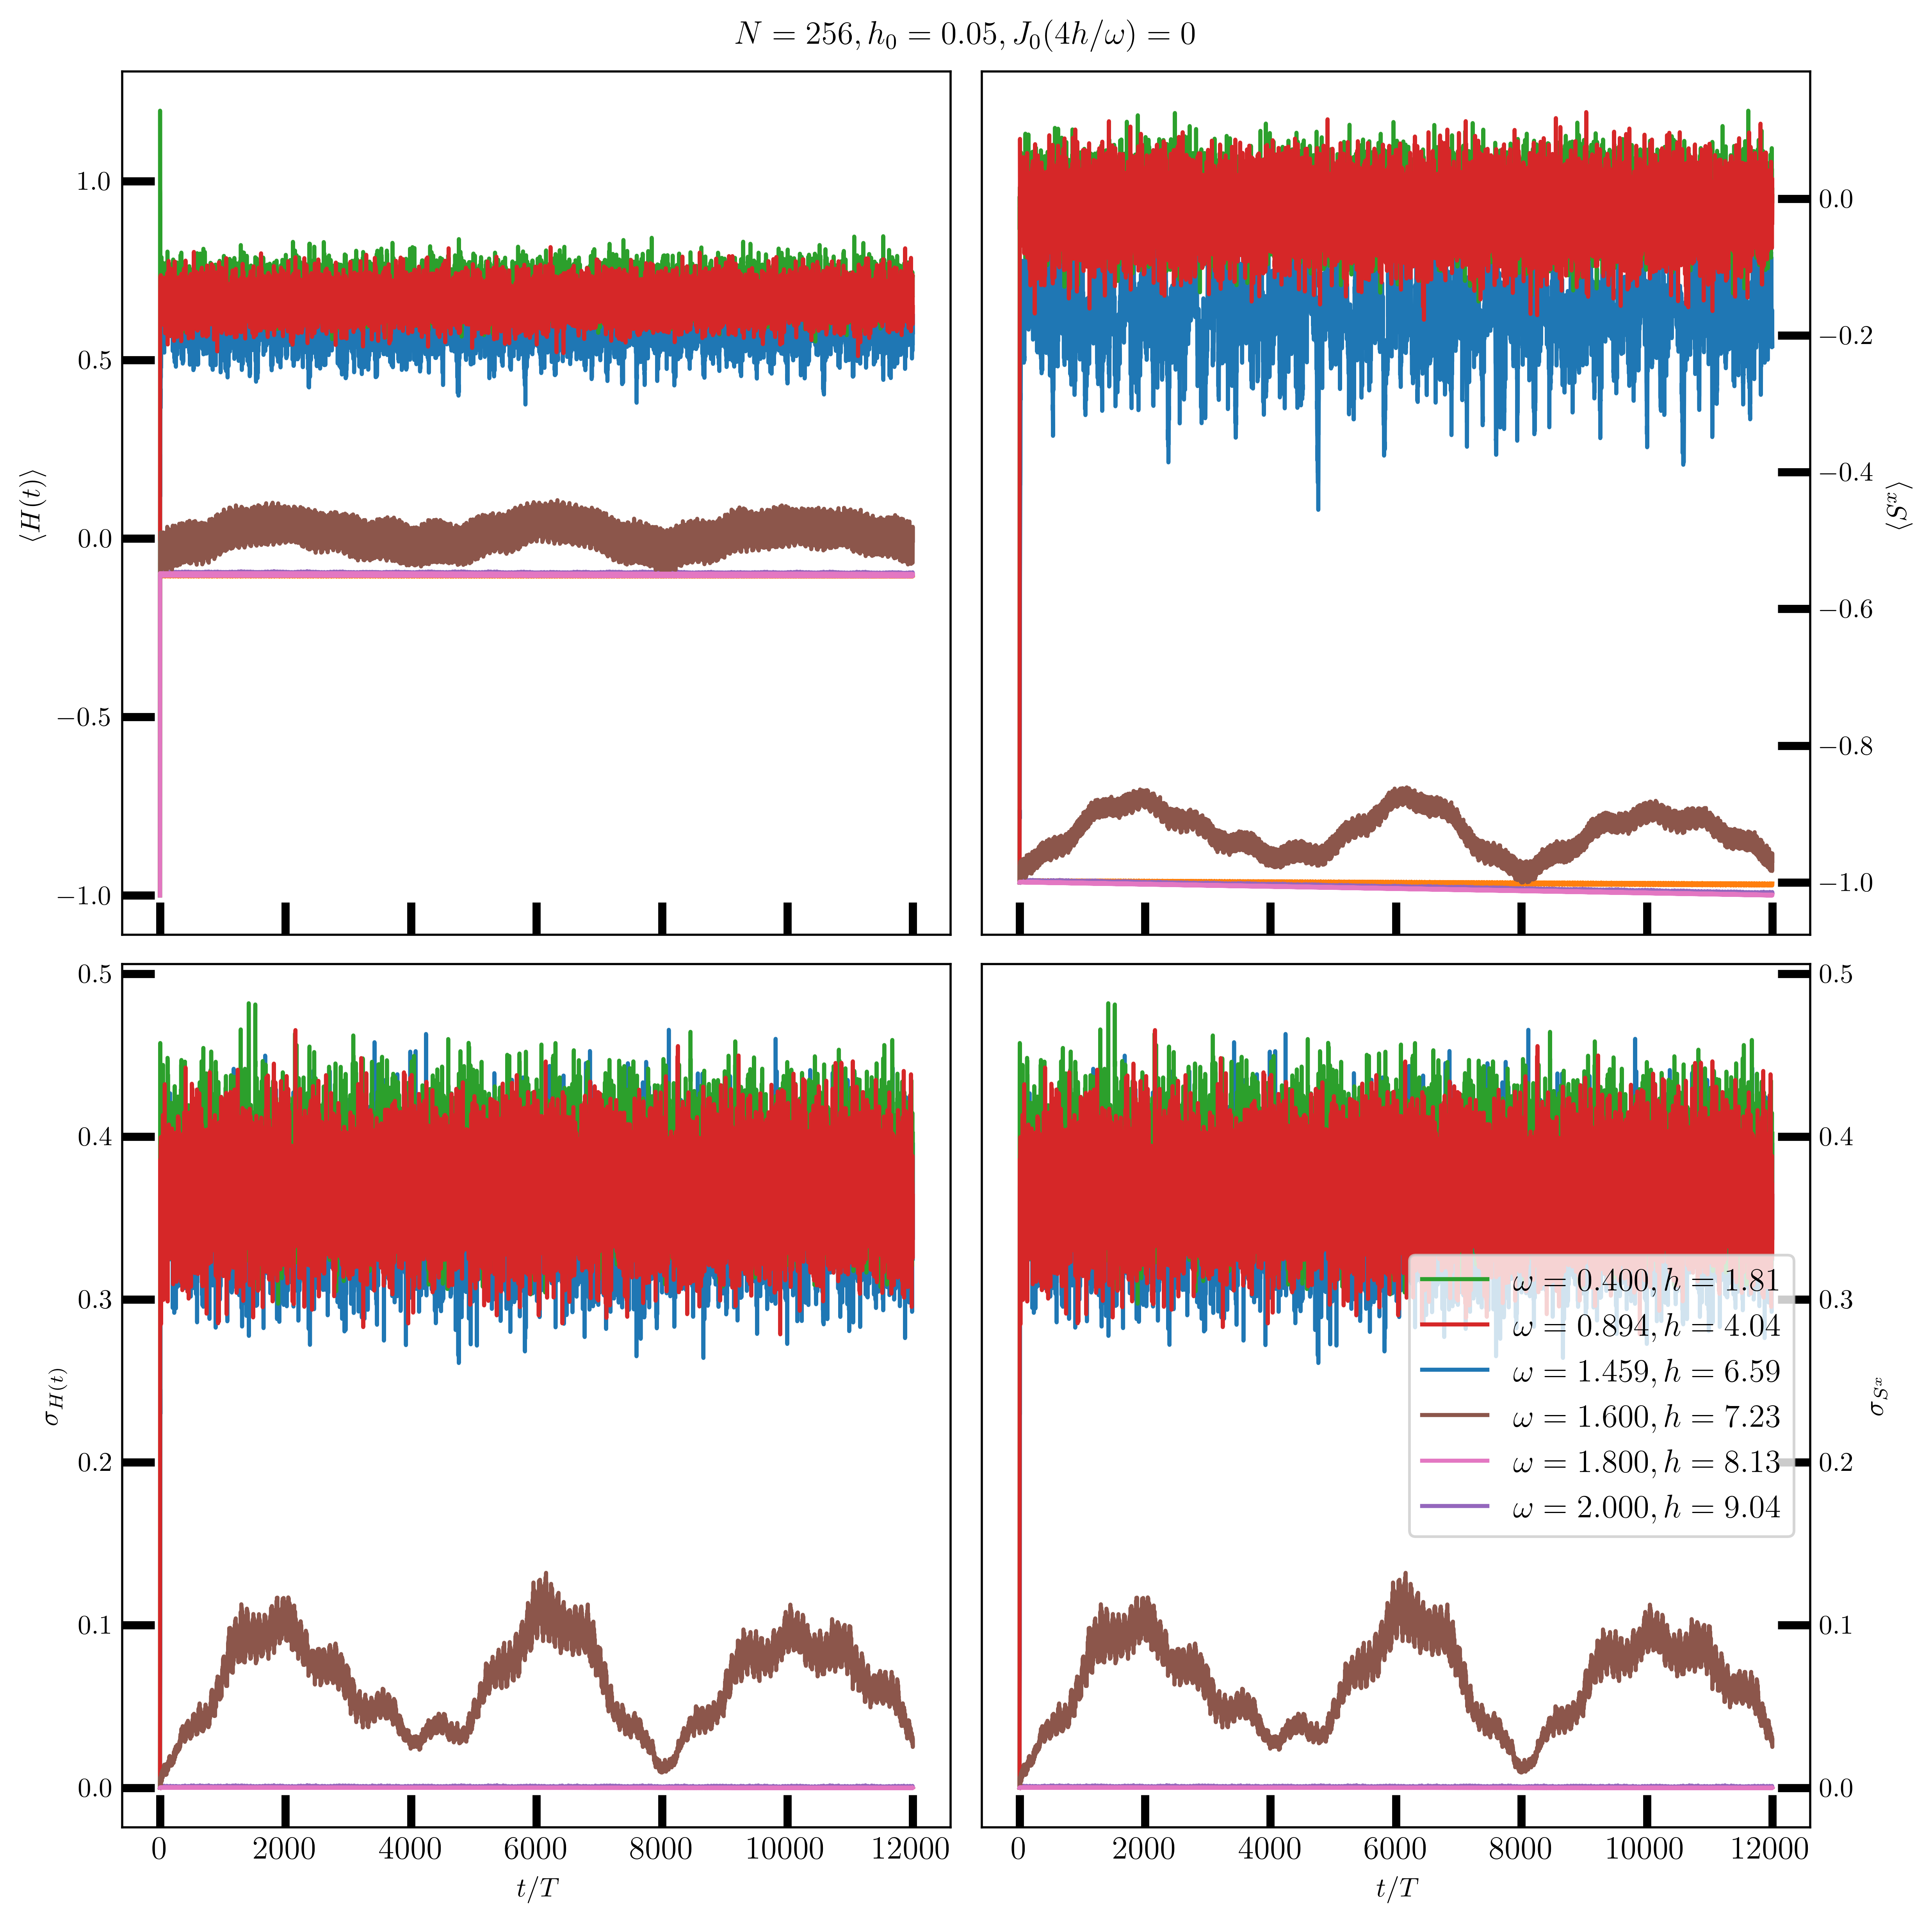

In [10]:
from scipy.special import j0
import matplotlib.pyplot as plt

keys = ['1','3']
keys2 = ['0','1','2']
keys3 = ['0','1']

fig,axs = plt.subplots(2,2, tight_layout=True, figsize=(10, 10))

fig.suptitle(fr'$N={N}, h_0={h0:1.2f}, J_0(4h/\omega)=0$')

for key in keys:
    data = fulldata[key]
    omega = data['metadata']['omega']
    h = data['metadata']['h']
    axs[0,0].plot(data['eavg'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[0,1].plot(data['sxavg'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[1,0].plot(data['evar'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[1,1].plot(data['evar'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')

for key in keys2:
    data = fulldata2[key]
    omega = data['metadata']['omega']
    h = data['metadata']['h']
    axs[0,0].plot(data['eavg'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[0,1].plot(data['sxavg'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[1,0].plot(data['evar'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[1,1].plot(data['evar'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')

for key in keys3:
    data = fulldata3[key]
    omega = data['metadata']['omega']
    h = data['metadata']['h']
    axs[0,0].plot(data['eavg'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[0,1].plot(data['sxavg'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[1,0].plot(data['evar'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[1,1].plot(data['evar'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')

axs[0,0].set_ylabel(r"$\langle H(t) \rangle$")
axs[1,0].set_ylabel(r"$\sigma_{H(t)}$")
axs[1,0].set_xlabel(r"$t/T$")
axs[0,1].set_ylabel(r"$\langle S^x \rangle$")
axs[1,1].set_ylabel(r"$\sigma_{S^x} $")
axs[1,1].set_xlabel(r"$t/T$")
axs[0,1].yaxis.tick_right()
axs[1,1].yaxis.tick_right()
axs[0,1].yaxis.set_label_position("right")
axs[1,1].yaxis.set_label_position("right")
axs[0,0].xaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])
axs[1,1].legend(loc='lower right')


#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [2,3,0,5,6,4]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

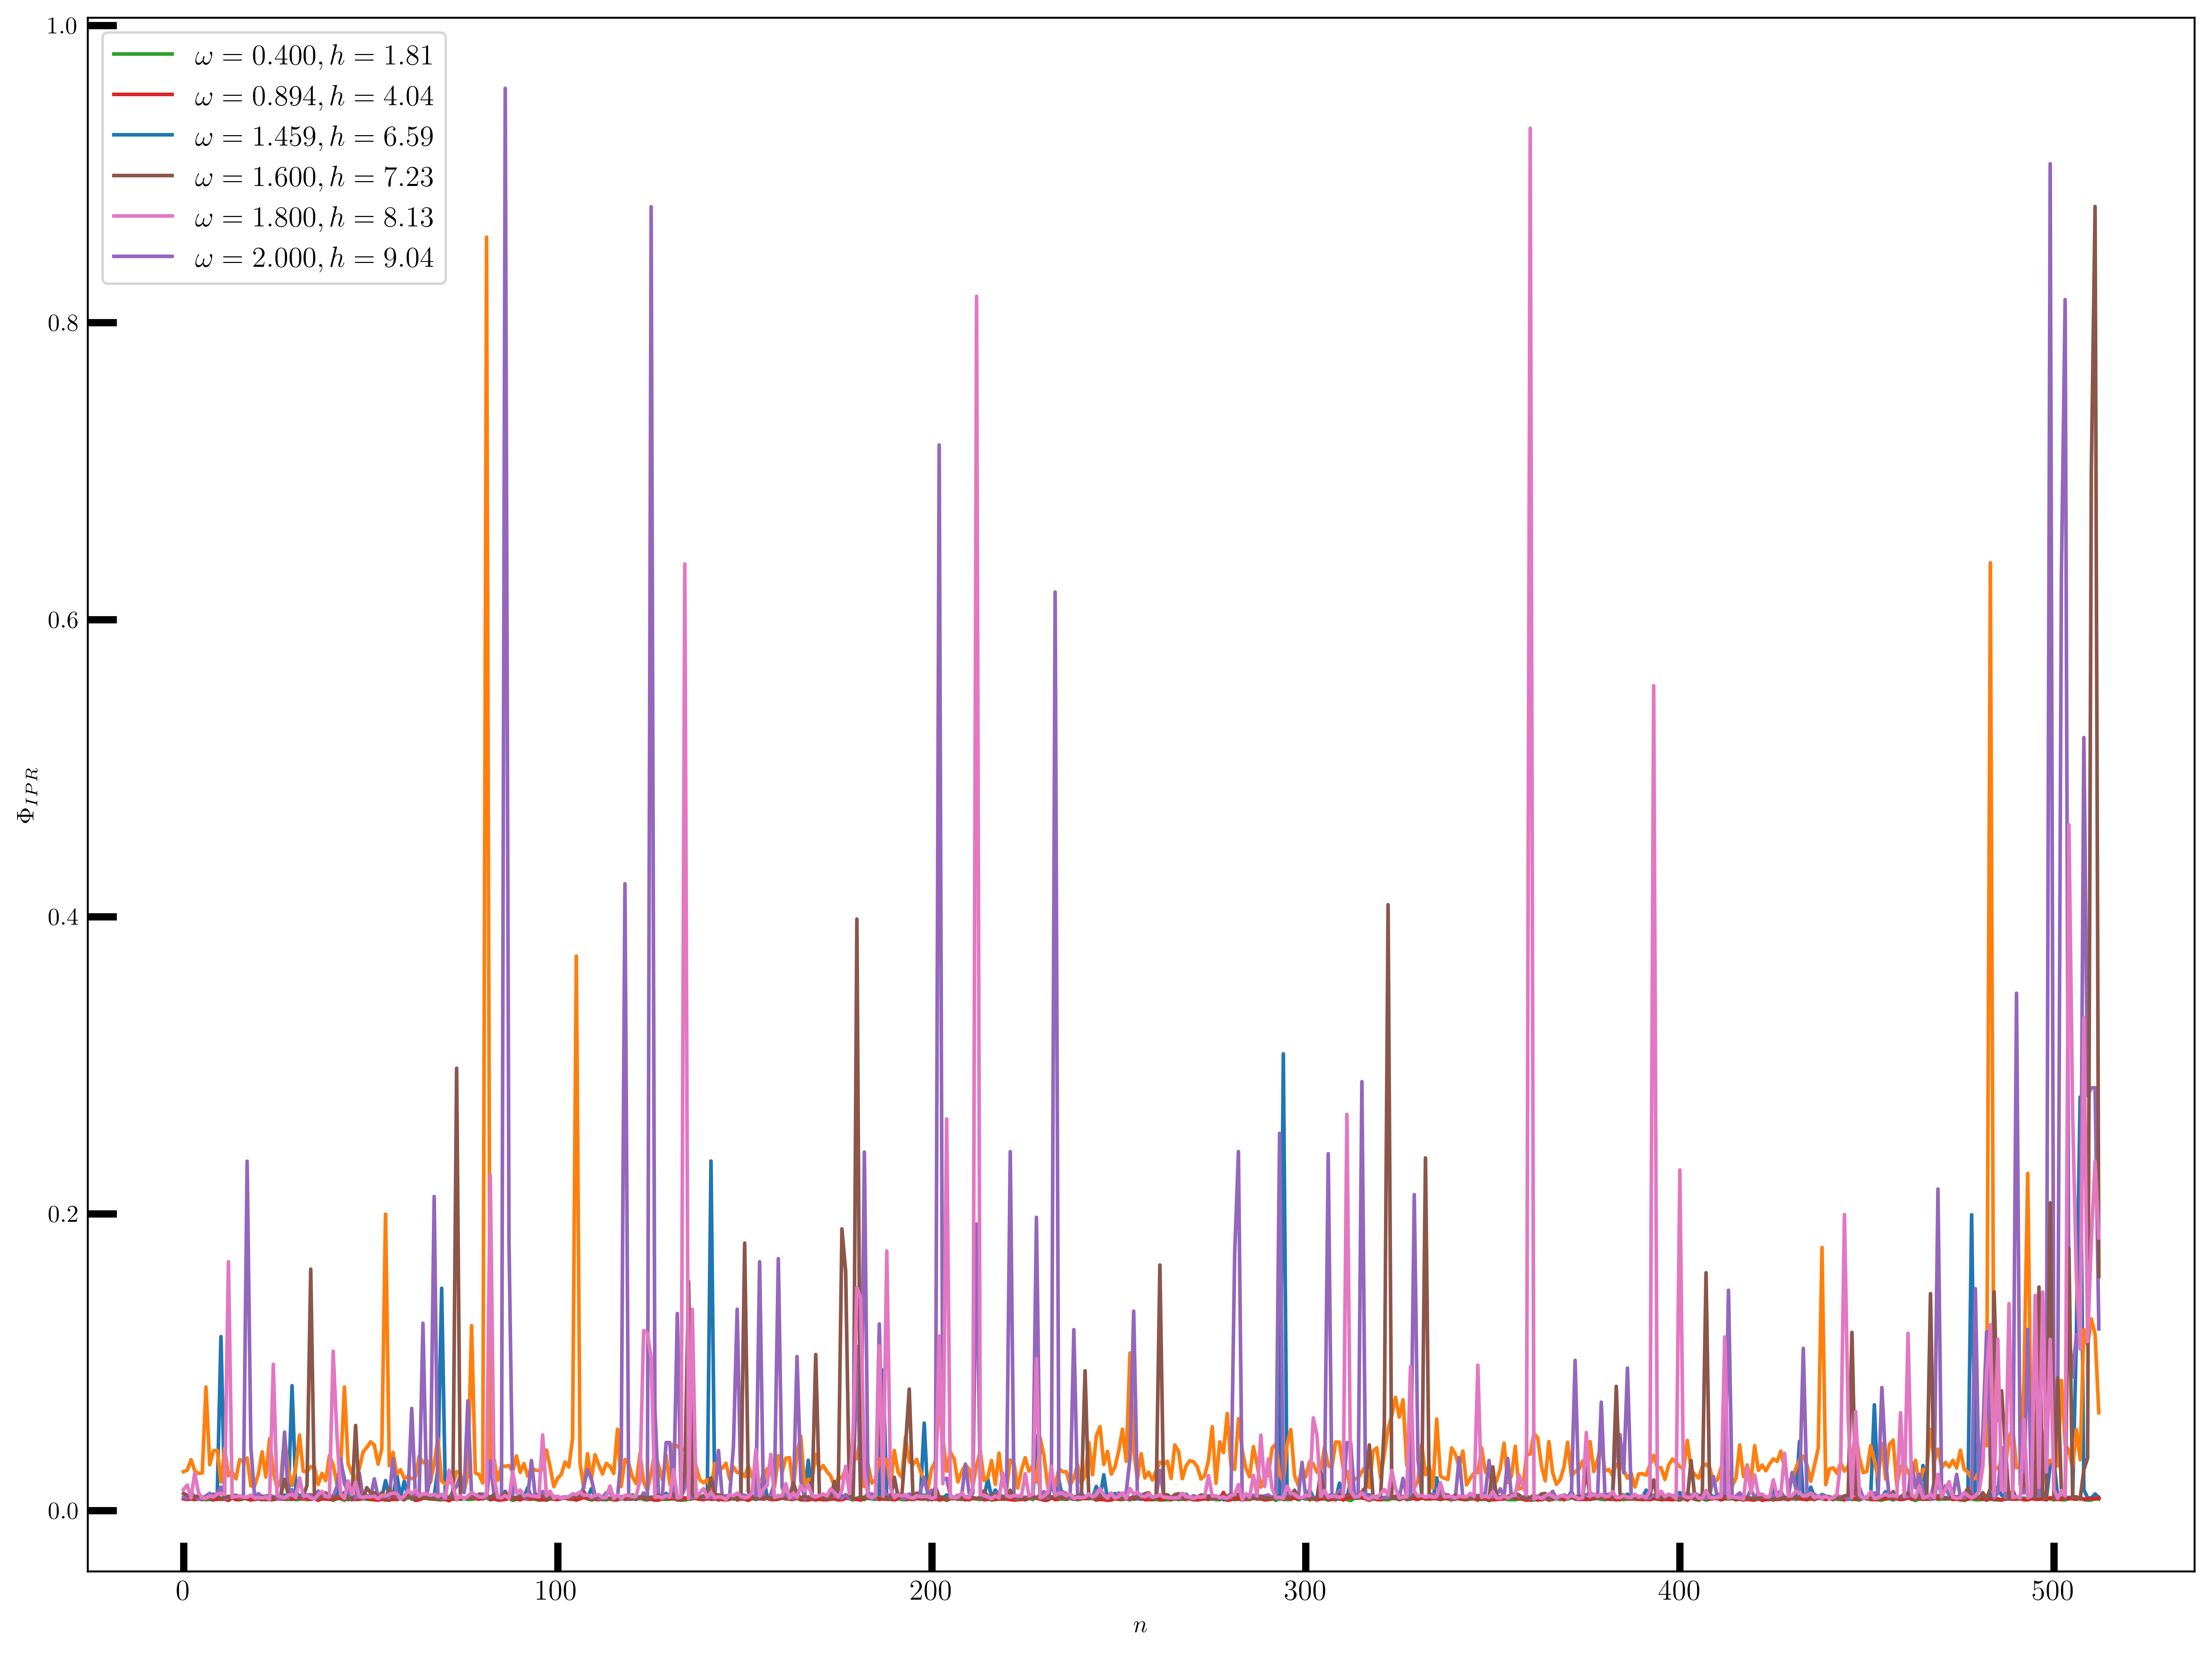

In [11]:
from scipy.special import j0
import matplotlib.pyplot as plt

keys = ['1','3']
keys2 = ['0','1','2']


for key in keys:
    data = fulldata[key]
    omega = data['metadata']['omega']
    h = data['metadata']['h']
    plt.plot(data['ipr'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')

    
for key in keys2:
    data = fulldata2[key]
    omega = data['metadata']['omega']
    h = data['metadata']['h']
    plt.plot(data['ipr'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')

for key in keys3:
    data = fulldata3[key]
    omega = data['metadata']['omega']
    h = data['metadata']['h']
    plt.plot(data['ipr'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')

plt.ylabel(r"$\Phi_{IPR}$")
plt.xlabel(r"$n$")
plt.legend(loc='lower right')


#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [2,3,0,5,6,4]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])